In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [171]:
attributes_data = pd.read_csv('attributes_data.csv')
attributes_data


,No_of_Male_Household_Members,No_of_Female_Household_Members,Total_No_of_Household_Members,House_Ownership_Status,Ownership_of_Agricultural_Land,Agricultural_Land_Unit_Owned,Total_Number_of_Rooms_in_House,Household_Location_(Urban_or_Rural),Gender,Age_in_Years,...,Thoughts_of_Being_Better_Off_Dead_Last_2_Weeks,Considered_Suicide_in_Last_Year,Family_Member_Thoughts_of_Being_Better_Off_Dead,Family_Member_Considered_Suicide_Last_Year,Family_Member_Made_Suicide_Plan_Last_Year,Family_Member_Attempted_Suicide_Last_Year,Self_Harm_by_Cutting_or_Beating_Last_Year,Self_Harm_by_Pulling_Hair_Last_Year,Self_Harm_by_Banging_or_Hitting_Last_Year,BMI_Category
0,2,1,3,1,False,0.0,2,True,female,18,...,3,2.0,4,2,0.0,0.0,3,3,3,normal
1,3,1,4,1,False,0.0,1,True,male,19,...,3,2.0,4,2,0.0,0.0,3,3,3,normal
2,2,1,3,1,False,0.0,1,False,male,19,...,3,2.0,4,2,0.0,0.0,3,3,3,underweight
3,0,2,2,1,False,0.0,1,True,male,18,...,3,2.0,3,1,1.0,1.0,3,3,3,normal
4,1,3,4,1,False,0.0,1,True,male,19,...,3,2.0,4,2,0.0,0.0,3,3,3,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,3,1,4,1,False,0.0,2,True,female,19,...,3,2.0,4,2,0.0,0.0,3,3,3,underweight
16288,5,2,7,1,False,0.0,4,True,female,12,...,3,0.0,3,2,0.0,0.0,3,3,3,underweight
16289,7,8,15,1,False,0.0,4,False,female,12,...,3,0.0,4,2,0.0,0.0,3,3,3,underweight
16290,2,2,4,1,True,6689.0,2,True,male,16,...,3,2.0,4,2,0.0,0.0,3,3,3,underweight


In [172]:
labels_data = pd.read_csv('labels_data.csv')
labels_data


,Made_Plan_for_Suicide_in_Last_Year,Number_of_Suicide_Attempts_in_Last_Year
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
16287,0.0,0.0
16288,0.0,0.0
16289,0.0,0.0
16290,0.0,0.0


<Axes: xlabel='likeliness of Suicide', ylabel='Frequency'>

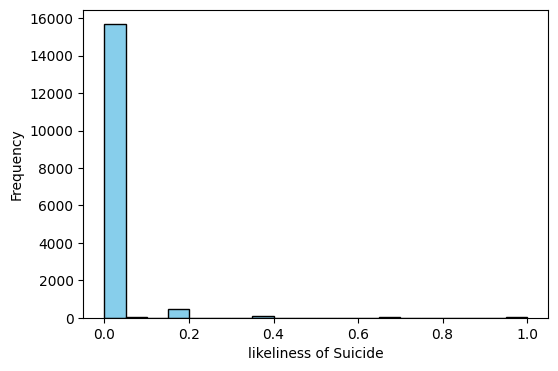

In [173]:
# Calculate the suicide likelihood score from label columns

label_weights = {    'Made_Plan_for_Suicide_in_Last_Year': 0.3,  # Same weight for planning
                    'Number_of_Suicide_Attempts_in_Last_Year': 1,  # Same weight for attempts
}

df_target = labels_data.apply(lambda row: sum(label_weights[col] * row[col] for col in label_weights if col in row), axis=1)
df_target_normalized_series = pd.Series((df_target - df_target.min()) / (df_target.max() - df_target.min()), name='Suicide_Likelihood')

# histogram plot of df_target_normalized_series
df_target_normalized_series.plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(6, 4), xlabel='likeliness of Suicide')


In [174]:
# Function to plot histograms for 6 sets of weights in a 2x3 subplot grid
def plot_multiple_histograms(label_weights_list, labels_data, n):
    fig, axes = plt.subplots(int(np.ceil(n/3)), 3, figsize=(20,int(5*np.ceil(n/3))))  # 3x3 grid for exactly 6 plots
    axes = axes.flatten()  # Flatten to easily iterate through axes

    for i, label_weights in enumerate(label_weights_list):
        # Calculate the suicide likelihood score
        df_target = labels_data.apply(lambda row: sum(label_weights[col] * row[col] for col in label_weights if col in row), axis=1)
        df_target_normalized = (df_target - df_target.min()) / (df_target.max() - df_target.min())
        df_target_normalized_series = pd.Series(df_target_normalized, name=f'Suicide_Likelihood_{i+1}')

        # Plot histogram on the corresponding axis
        ax = axes[i]
        df_target_normalized_series.plot(kind='hist', bins=20, color='skyblue', edgecolor='black', alpha=0.7, ax=ax)
        ax.set_title(f"Suicide Likelihood, Weights => ({label_weights['Made_Plan_for_Suicide_in_Last_Year']}, {label_weights['Number_of_Suicide_Attempts_in_Last_Year']})")
        ax.set_xlabel('Likelihood of Suicide')
        ax.set_ylabel('Frequency')
        ax.grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [175]:
import itertools

# Generate combinations where w1 < w2
weight_values = np.arange(0, 1.1, 0.1)
label_weights_list = [
    {'Made_Plan_for_Suicide_in_Last_Year': w1, 'Number_of_Suicide_Attempts_in_Last_Year': w2}
    for w1, w2 in itertools.product(weight_values, repeat=2)
    if w1 < w2
]

print(len(label_weights_list))

label_weights_list[0]


55


{'Made_Plan_for_Suicide_in_Last_Year': np.float64(0.0),
 'Number_of_Suicide_Attempts_in_Last_Year': np.float64(0.1)}

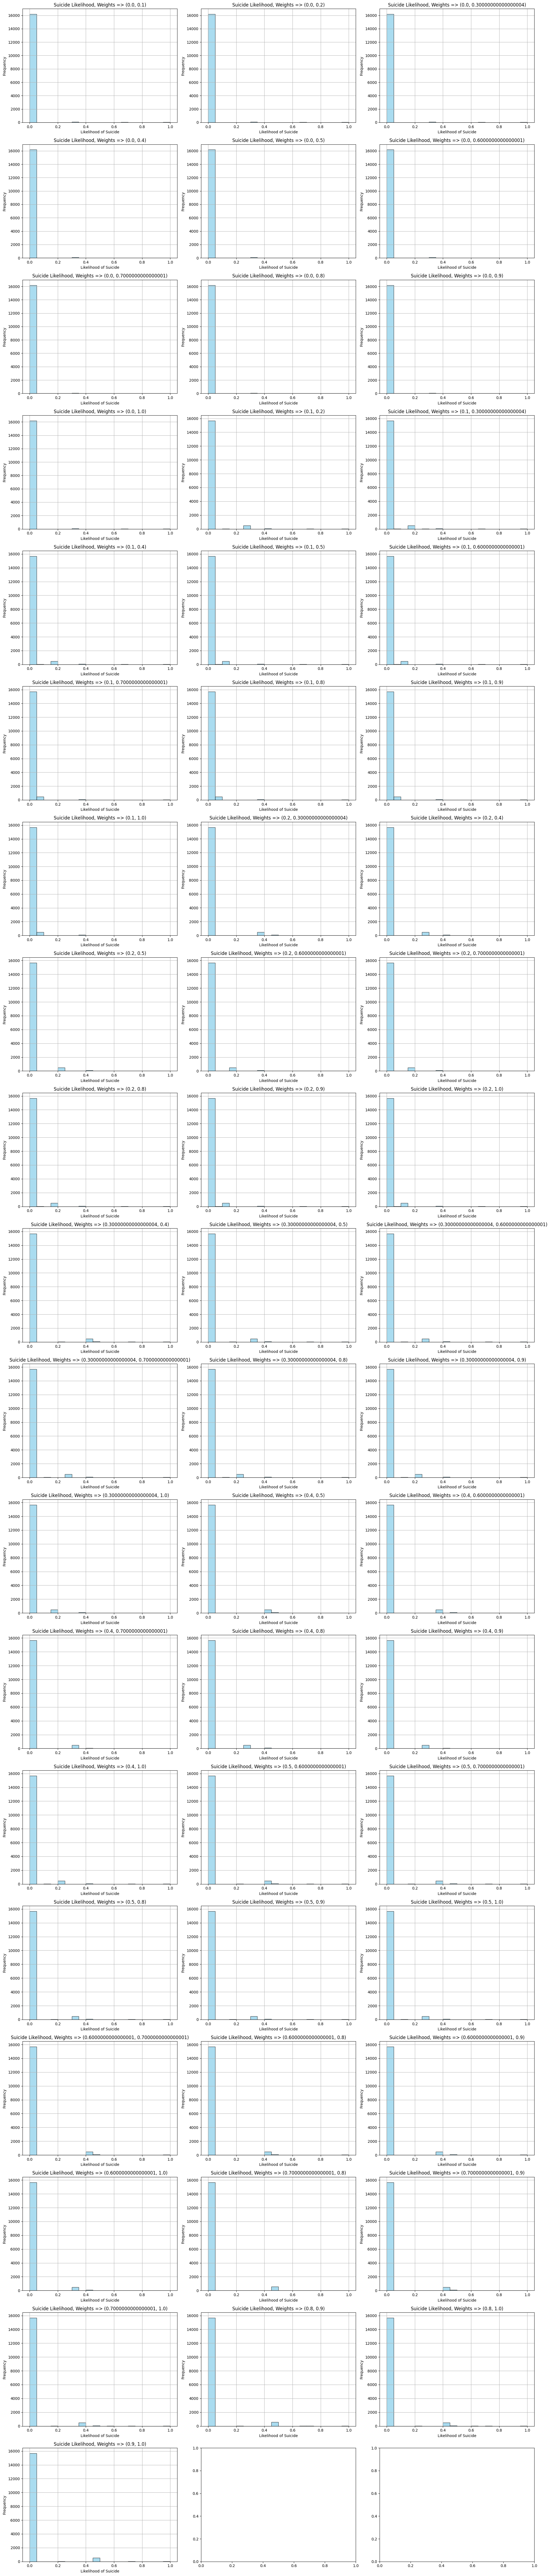

In [176]:
# plotting all posible combinations of w1 and w2 weights
plot_multiple_histograms(label_weights_list, labels_data, len(label_weights_list))


<Axes: xlabel='likeliness of Suicide', ylabel='Frequency'>

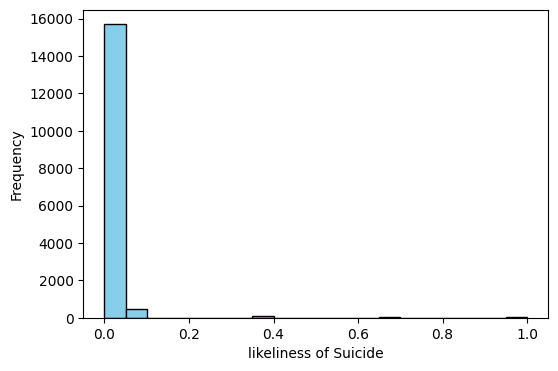

In [177]:
# Calculate the suicide likelihood score from label columns

label_weights = {    'Made_Plan_for_Suicide_in_Last_Year': 0.1,  # Same weight for planning
                    'Number_of_Suicide_Attempts_in_Last_Year': 0.8,  # Same weight for attempts
}

df_target = labels_data.apply(lambda row: sum(label_weights[col] * row[col] for col in label_weights if col in row), axis=1)
df_target = pd.Series((df_target - df_target.min()) / (df_target.max() - df_target.min()), name='Suicide_Likelihood')

# histogram plot of df_target_normalized_series
df_target.plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(6, 4), xlabel='likeliness of Suicide')


### Create Proper Dataset

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder


In [179]:
# Assume X and y are your feature matrix and target vector
X = attributes_data
y = df_target


In [180]:
X


,No_of_Male_Household_Members,No_of_Female_Household_Members,Total_No_of_Household_Members,House_Ownership_Status,Ownership_of_Agricultural_Land,Agricultural_Land_Unit_Owned,Total_Number_of_Rooms_in_House,Household_Location_(Urban_or_Rural),Gender,Age_in_Years,...,Thoughts_of_Being_Better_Off_Dead_Last_2_Weeks,Considered_Suicide_in_Last_Year,Family_Member_Thoughts_of_Being_Better_Off_Dead,Family_Member_Considered_Suicide_Last_Year,Family_Member_Made_Suicide_Plan_Last_Year,Family_Member_Attempted_Suicide_Last_Year,Self_Harm_by_Cutting_or_Beating_Last_Year,Self_Harm_by_Pulling_Hair_Last_Year,Self_Harm_by_Banging_or_Hitting_Last_Year,BMI_Category
0,2,1,3,1,False,0.0,2,True,female,18,...,3,2.0,4,2,0.0,0.0,3,3,3,normal
1,3,1,4,1,False,0.0,1,True,male,19,...,3,2.0,4,2,0.0,0.0,3,3,3,normal
2,2,1,3,1,False,0.0,1,False,male,19,...,3,2.0,4,2,0.0,0.0,3,3,3,underweight
3,0,2,2,1,False,0.0,1,True,male,18,...,3,2.0,3,1,1.0,1.0,3,3,3,normal
4,1,3,4,1,False,0.0,1,True,male,19,...,3,2.0,4,2,0.0,0.0,3,3,3,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,3,1,4,1,False,0.0,2,True,female,19,...,3,2.0,4,2,0.0,0.0,3,3,3,underweight
16288,5,2,7,1,False,0.0,4,True,female,12,...,3,0.0,3,2,0.0,0.0,3,3,3,underweight
16289,7,8,15,1,False,0.0,4,False,female,12,...,3,0.0,4,2,0.0,0.0,3,3,3,underweight
16290,2,2,4,1,True,6689.0,2,True,male,16,...,3,2.0,4,2,0.0,0.0,3,3,3,underweight


In [181]:
y


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16287    0.0
16288    0.0
16289    0.0
16290    0.0
16291    0.0
Name: Suicide_Likelihood, Length: 16292, dtype: float64

In [182]:
# Separate categorical columns and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_columns = X.select_dtypes(exclude=['object', 'category']).columns.to_list()

# Initialize OneHotEncoder without dropping any columns
encoder = OneHotEncoder(drop=None, sparse_output=False)  # Each category will have its own column

# Fit and transform the categorical columns
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded columns to a DataFrame
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_column_names, index=X.index)

# Combine the original numerical columns with the encoded categorical columns
df_combined = pd.concat([X[numeric_columns].reset_index(drop=True), X_categorical_encoded_df.reset_index(drop=True)], axis=1)


In [183]:
df_combined


,No_of_Male_Household_Members,No_of_Female_Household_Members,Total_No_of_Household_Members,House_Ownership_Status,Ownership_of_Agricultural_Land,Agricultural_Land_Unit_Owned,Total_Number_of_Rooms_in_House,Household_Location_(Urban_or_Rural),Age_in_Years,Highest_Education_Level_of_Mother,...,Religion_H,Religion_M,Religion_O,Caste_Category_GEN,Caste_Category_OBC,Caste_Category_SC,Caste_Category_ST,BMI_Category_normal,BMI_Category_overweight,BMI_Category_underweight
0,2,1,3,1,False,0.0,2,True,18,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,4,1,False,0.0,1,True,19,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,1,3,1,False,0.0,1,False,19,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,2,2,1,False,0.0,1,True,18,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,3,4,1,False,0.0,1,True,19,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,3,1,4,1,False,0.0,2,True,19,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16288,5,2,7,1,False,0.0,4,True,12,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16289,7,8,15,1,False,0.0,4,False,12,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16290,2,2,4,1,True,6689.0,2,True,16,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [184]:
categorical_columns

['Gender', 'Religion', 'Caste_Category', 'BMI_Category']

In [185]:
# print all the values_count for the categorical_columns of the data frame X
for col in categorical_columns:
    print(f'{col}:\n{X[col].value_counts()}\n')

Gender:
Gender
male      10334
female     5958
Name: count, dtype: int64

Religion:
Religion
H    13030
M     3203
O       59
Name: count, dtype: int64

Caste_Category:
Caste_Category
OBC    9425
SC     3819
GEN    2908
ST      140
Name: count, dtype: int64

BMI_Category:
BMI_Category
normal         11932
underweight     4232
overweight       128
Name: count, dtype: int64



In [186]:
X.columns

Index(['No_of_Male_Household_Members', 'No_of_Female_Household_Members',
       'Total_No_of_Household_Members', 'House_Ownership_Status',
       'Ownership_of_Agricultural_Land', 'Agricultural_Land_Unit_Owned',
       'Total_Number_of_Rooms_in_House', 'Household_Location_(Urban_or_Rural)',
       'Gender', 'Age_in_Years', 'Religion', 'Caste_Category',
       'Highest_Education_Level_of_Mother',
       'Highest_Education_Level_of_Father',
       'Family_Members_Using_Tobacco_Products',
       'Family_Members_Consuming_Alcohol', 'Family_Members_Using_Drugs',
       'Ever_Used_Tobacco', 'Tobacco_Use_in_Last_Month',
       'Ever_Consumed_Alcohol', 'Alcohol_Consumption_in_Last_Month',
       'Ever_Used_Drugs', 'Drug_Use_in_Last_Month',
       'Injured_in_Road_Accident_Last_3_Months',
       'Injured_in_Other_Incidents_Last_3_Months',
       'Currently_Attending_School', 'Number_of_Close_Friends',
       'Ever_Had_Boyfriend_or_Girlfriend',
       'Total_Number_of_Boyfriends_or_Girlfriends',

In [187]:
df_combined.columns


Index(['No_of_Male_Household_Members', 'No_of_Female_Household_Members',
       'Total_No_of_Household_Members', 'House_Ownership_Status',
       'Ownership_of_Agricultural_Land', 'Agricultural_Land_Unit_Owned',
       'Total_Number_of_Rooms_in_House', 'Household_Location_(Urban_or_Rural)',
       'Age_in_Years', 'Highest_Education_Level_of_Mother',
       'Highest_Education_Level_of_Father',
       'Family_Members_Using_Tobacco_Products',
       'Family_Members_Consuming_Alcohol', 'Family_Members_Using_Drugs',
       'Ever_Used_Tobacco', 'Tobacco_Use_in_Last_Month',
       'Ever_Consumed_Alcohol', 'Alcohol_Consumption_in_Last_Month',
       'Ever_Used_Drugs', 'Drug_Use_in_Last_Month',
       'Injured_in_Road_Accident_Last_3_Months',
       'Injured_in_Other_Incidents_Last_3_Months',
       'Currently_Attending_School', 'Number_of_Close_Friends',
       'Ever_Had_Boyfriend_or_Girlfriend',
       'Total_Number_of_Boyfriends_or_Girlfriends',
       'Ever_Hugged_Boyfriend_or_Girlfriend',


In [188]:
# convert the columns with boolean values to 0,1 for false and true respectively

# Seprate columns with boolean values
boolean_columns = X.select_dtypes(include=['bool']).columns.to_list()

# Initialize OneHotEncoder without dropping any columns and fit and transform the boolean columns
encoder1 = OneHotEncoder(drop='first', sparse_output=False) # To reduce multicollinearity
X_boolean_encoded = encoder1.fit_transform(X[boolean_columns])

# Convert encoded columns to a DataFrame and replace with the original DataFrame
encoded_column_names1 = encoder1.get_feature_names_out(boolean_columns)
X_boolean_encoded_df = pd.DataFrame(X_boolean_encoded, columns=encoded_column_names1, index=X.index)
df_combined = pd.concat([df_combined.reset_index(drop=True), X_boolean_encoded_df.reset_index(drop=True)], axis=1)
df_combined.drop(columns=boolean_columns, inplace=True)


In [189]:
df_combined

,No_of_Male_Household_Members,No_of_Female_Household_Members,Total_No_of_Household_Members,House_Ownership_Status,Agricultural_Land_Unit_Owned,Total_Number_of_Rooms_in_House,Age_in_Years,Highest_Education_Level_of_Mother,Highest_Education_Level_of_Father,Number_of_Close_Friends,...,Ever_Had_Boyfriend_or_Girlfriend_True,Ever_Hugged_Boyfriend_or_Girlfriend_True,Ever_Kissed_Boyfriend_or_Girlfriend_on_Lips_True,Ever_Had_Sexual_Intercourse_with_Boyfriend_or_Girlfriend_True,Currently_Seeking_Paid_Job_True,Father_Ever_Physically_Abused_Mother_True,Father_Physically_Abused_Mother_in_Last_12_Months_True,Physically_Hurt_by_Parents_Since_Age_10_True,Physically_Hurt_by_Parents_in_Last_12_Months_True,Involved_in_Physical_Fights_Last_12_Months_True
0,2,1,3,1,0.0,2,18,0,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,4,1,0.0,1,19,0,4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1,3,1,0.0,1,19,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,2,1,0.0,1,18,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,1,0.0,1,19,0,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,3,1,4,1,0.0,2,19,0,0,8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16288,5,2,7,1,0.0,4,12,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16289,7,8,15,1,0.0,4,12,0,8,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
16290,2,2,4,1,6689.0,2,16,0,12,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16287    0.0
16288    0.0
16289    0.0
16290    0.0
16291    0.0
Name: Suicide_Likelihood, Length: 16292, dtype: float64

In [191]:
# Discretize the target variable 'y' into bins (adjust bin edges based on your needs)
bins = np.arange(0, 1.1, 0.1)
y_binned = pd.cut(y, bins=bins, labels=np.arange(len(bins)-1))  # Create discrete labels

# Replace any NaN values with 0
y_binned = y_binned.fillna(0).astype(int)  # Fill NaN with 0 and convert to integers
y_binned


0        0
1        0
2        0
3        0
4        0
        ..
16287    0
16288    0
16289    0
16290    0
16291    0
Name: Suicide_Likelihood, Length: 16292, dtype: int64

In [192]:
# save the data to csv
df_combined.to_csv('X_encoded.csv', index=False)
y_binned.to_csv('y_binned.csv', index=False)


### Create Models for prediction

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC
from imblearn.pipeline import Pipeline

In [194]:
X_encoded = pd.read_csv('X_encoded.csv')
X_encoded


,No_of_Male_Household_Members,No_of_Female_Household_Members,Total_No_of_Household_Members,House_Ownership_Status,Agricultural_Land_Unit_Owned,Total_Number_of_Rooms_in_House,Age_in_Years,Highest_Education_Level_of_Mother,Highest_Education_Level_of_Father,Number_of_Close_Friends,...,Ever_Had_Boyfriend_or_Girlfriend_True,Ever_Hugged_Boyfriend_or_Girlfriend_True,Ever_Kissed_Boyfriend_or_Girlfriend_on_Lips_True,Ever_Had_Sexual_Intercourse_with_Boyfriend_or_Girlfriend_True,Currently_Seeking_Paid_Job_True,Father_Ever_Physically_Abused_Mother_True,Father_Physically_Abused_Mother_in_Last_12_Months_True,Physically_Hurt_by_Parents_Since_Age_10_True,Physically_Hurt_by_Parents_in_Last_12_Months_True,Involved_in_Physical_Fights_Last_12_Months_True
0,2,1,3,1,0.0,2,18,0,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,4,1,0.0,1,19,0,4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1,3,1,0.0,1,19,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,2,1,0.0,1,18,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,1,0.0,1,19,0,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,3,1,4,1,0.0,2,19,0,0,8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16288,5,2,7,1,0.0,4,12,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16289,7,8,15,1,0.0,4,12,0,8,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
16290,2,2,4,1,6689.0,2,16,0,12,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
y_binned = pd.read_csv('y_binned.csv')
y_binned


,Suicide_Likelihood
0,0
1,0
2,0
3,0
4,0
...,...
16287,0
16288,0
16289,0
16290,0


In [196]:
# Check initial class distribution in y_binned
print("Initial class distribution in y_binned:")
print(y_binned.value_counts())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binned, test_size=0.3, stratify=y_binned, random_state=42)

# Create a pipeline to handle zero-sample classes using RandomOverSampler and SMOTE
resampling_pipeline = Pipeline([
    ('random_oversampler', RandomOverSampler(sampling_strategy='not majority', random_state=42)),
    ('smote', SMOTE(random_state=42))
])

# Fit and resample the training data
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("\nClass distribution after RandomOverSampler + SMOTE:")
print(y_resampled.value_counts())


Initial class distribution in y_binned:
Suicide_Likelihood
0                     16172
3                        75
9                        24
6                        18
1                         3
Name: count, dtype: int64

Class distribution after RandomOverSampler + SMOTE:
Suicide_Likelihood
0                     11320
1                     11320
3                     11320
6                     11320
9                     11320
Name: count, dtype: int64


<Axes: xlabel='likeliness of Suicide', ylabel='Frequency'>

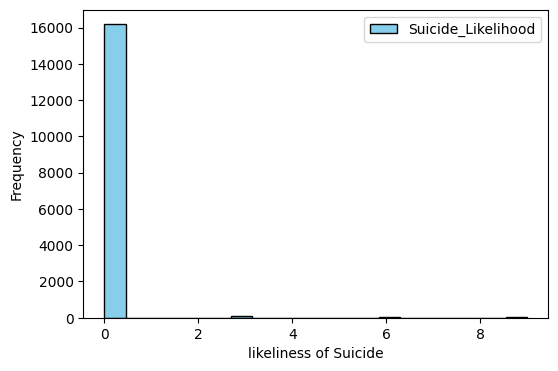

In [197]:
y_binned.plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(6, 4), xlabel='likeliness of Suicide')

<Axes: xlabel='likeliness of Suicide', ylabel='Frequency'>

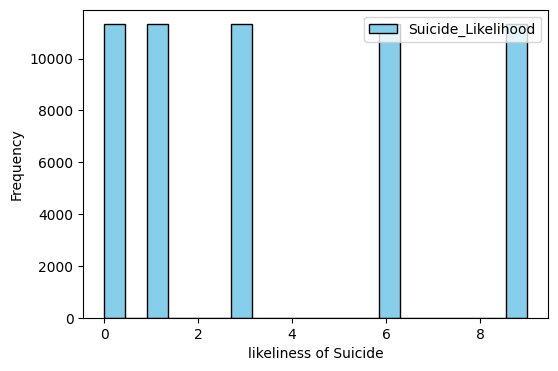

In [198]:
y_resampled.plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(6, 4), xlabel='likeliness of Suicide')

In [ ]:
X_ = X_encoded
y_ = y_binned

# Uncomment below two lines to use balanced training data
X_ = X_resampled
y_ = y_resampled

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.3, stratify=y_, random_state=42)


In [200]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((39620, 60), (16980, 60), (39620, 1), (16980, 1))

In [201]:
l = [y_train, y_val]

# print all the values_count for the above data
for data in l:
    print(f'{data.value_counts()}\n')

# Where, (Suicide_Likelihood i) => (the persons likeliness to suicide is between [i to i+1] * 10% )

Suicide_Likelihood
0                     7924
1                     7924
3                     7924
6                     7924
9                     7924
Name: count, dtype: int64

Suicide_Likelihood
0                     3396
1                     3396
3                     3396
6                     3396
9                     3396
Name: count, dtype: int64



In [202]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score


In [203]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_val)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt))

Decision Tree Accuracy: 0.9989399293286219
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3396
           1       1.00      1.00      1.00      3396
           3       1.00      1.00      1.00      3396
           6       1.00      1.00      1.00      3396
           9       1.00      1.00      1.00      3396

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



In [204]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_val)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Classification Report:\n", classification_report(y_val, y_pred_logreg))

C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.8134864546525324
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      3396
           1       0.88      1.00      0.94      3396
           3       0.70      0.55      0.62      3396
           6       0.84      0.77      0.81      3396
           9       0.72      0.88      0.79      3396

    accuracy                           0.81     16980
   macro avg       0.81      0.81      0.81     16980
weighted avg       0.81      0.81      0.81     16980



C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3396
           3       1.00      1.00      1.00      3396
           6       1.00      1.00      1.00      3396
           9       1.00      1.00      1.00      3396

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



In [206]:
# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_pred_knn))

C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.9982332155477032
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3396
           1       1.00      1.00      1.00      3396
           3       0.99      1.00      1.00      3396
           6       1.00      1.00      1.00      3396
           9       1.00      1.00      1.00      3396

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



In [208]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on y_train and transform both y_train and y_val to ensure consistent labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_val_encoded, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val_encoded, y_pred_xgb))

# If you want to display the class labels back to their original form
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)


C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:28:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9989988221436985
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3396
           1       1.00      1.00      1.00      3396
           2       1.00      1.00      1.00      3396
           3       1.00      1.00      1.00      3396
           4       1.00      1.00      1.00      3396

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



In [209]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_val)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_val, y_pred_nb))
print("Classification Report:\n", classification_report(y_val, y_pred_nb))

Naive Bayes Accuracy: 0.795583038869258
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86      3396
           1       1.00      1.00      1.00      3396
           3       0.69      0.52      0.60      3396
           6       0.84      0.62      0.71      3396
           9       0.68      0.87      0.77      3396

    accuracy                           0.80     16980
   macro avg       0.80      0.80      0.79     16980
weighted avg       0.80      0.80      0.79     16980



C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [210]:
# Initialize the Neural Network model
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_val)

# Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("Classification Report:\n", classification_report(y_val, y_pred_mlp))

C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Accuracy: 0.9980565371024736
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3396
           1       1.00      1.00      1.00      3396
           3       1.00      1.00      1.00      3396
           6       1.00      1.00      1.00      3396
           9       1.00      1.00      1.00      3396

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



In [207]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_val)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Classification Report:\n", classification_report(y_val, y_pred_gb))

C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.9958186101295642
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3396
           1       1.00      1.00      1.00      3396
           3       0.99      1.00      0.99      3396
           6       1.00      1.00      1.00      3396
           9       1.00      1.00      1.00      3396

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



In [211]:
# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_val)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))

C:\Users\Samarth Walse\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.3030035335689046
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.06      0.10      3396
           1       0.25      1.00      0.40      3396
           3       0.48      0.21      0.30      3396
           6       0.63      0.14      0.23      3396
           9       0.57      0.10      0.17      3396

    accuracy                           0.30     16980
   macro avg       0.51      0.30      0.24     16980
weighted avg       0.51      0.30      0.24     16980

